<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<b> Questions </b>
<li> Can we do better by including/excluding some features from the features dataframe? 
<li> What would happen if we applied k-means clustering to the full dataset instead of the reduced dataset?
<li> What would happen if we applied k-means clustering to a UMAP-reduced dataset? 
<li> When does k-means clustering work well? When does it fail? Look at the different clustering methods and the kinds of data they work on. 
</div>

In [15]:
# Relevant imports
import numpy as np

%matplotlib inline
import pandas as pd

# dir handling
import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# read structural features of excitatory cells
feat_df = pd.read_feather('../../workshop1/data/dfct_e.feather')

In [17]:
from sklearn.decomposition import PCA

In [18]:
# sample list of features that are retained. We are reducing correlated features...
# ... but we encourage you to play around with what features to include
reduced_for_kmeans = feat_df[[
    "tip_len_dist_dendrite_p50",
    "tip_tort_dendrite_p50",
    "num_syn_dendrite",
    "num_syn_soma",
    "path_length_dendrite",
    "radial_extent_dendrite",
    "syn_dist_distribution_dendrite_p50",
    "syn_size_distribution_soma_p50",
    "syn_size_distribution_dendrite_p50",
    "syn_size_distribution_dendrite_dyn_range",
    "syn_depth_dist_p5",
    "syn_depth_dist_p95",
    "syn_depth_extent",
    "max_density",
    "radius_dist",
    "syn_count_pca0",
    "syn_count_pca1",
    "syn_count_pca2",
    "syn_count_pca3",
    "syn_count_pca4",
    "syn_count_pca5",
    "branch_svd0",
    "branch_svd1",
    "branch_svd2",
    "ego_count_pca0",
    "ego_count_pca1",
    "ego_count_pca2",
    "ego_count_pca3",
    "ego_count_pca4",
] ]

In [19]:
# z-score data
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
reduced_for_kmeans_transformed = pd.DataFrame(std_scaler.fit_transform(reduced_for_kmeans))

#reduced_for_kmeans.apply(zscore)
PCA_model = PCA(n_components=3)
reduced_data = PCA_model.fit_transform(reduced_for_kmeans_transformed)

In [20]:
# We will append this to the original dataframe as the PC0, PC1 components
feat_df['pc0'] = reduced_data[:,0]
feat_df['pc1'] = reduced_data[:,1]
feat_df['pc2'] = reduced_data[:,2]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<li> What would happen if we applied k-means clustering to the full dataset instead of the reduced dataset?
</div>

In [22]:
# fit k-means on all features
from sklearn.cluster import KMeans
# how many clusters? 
n_celltypes = 3
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans_predict = kmeans.fit(reduced_for_kmeans_transformed)

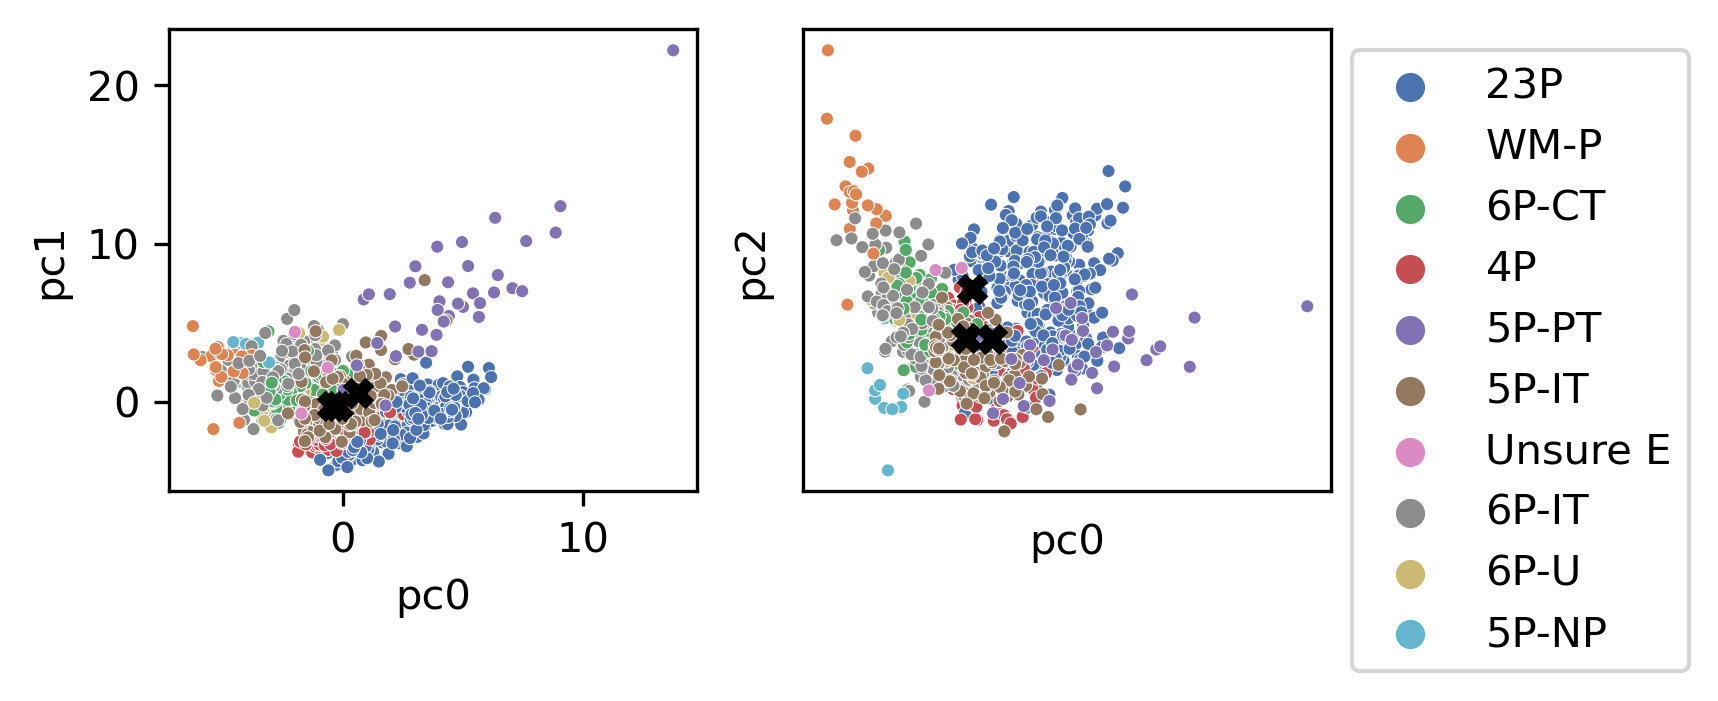

In [23]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(5, 2), dpi=300)
#plt.figure(1)
#plt.clf()


#plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
ax0.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=30,
    linewidths=3,
    color="k",
    zorder=10,
)

p1 = sns.scatterplot(
    x="pc0",
    y="pc1",
    data=feat_df.query('cell_type != "Unsure I"'),
    s=10,
    hue="cell_type", palette='deep', ax = ax0
    
)
p1.get_legend().remove()


#plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
ax1.scatter(
    centroids[:, 0],
    centroids[:, 2],
    marker="x",
    s=30,
    linewidths=3,
    color="k",
    zorder=10,
)

sns.scatterplot(
    x="pc0",
    y="pc2",
    data=feat_df.query('cell_type != "Unsure I"'),
    s=10,
    hue="cell_type", palette='deep', ax = ax1
    
)


#plt.title(
#    "K-means clustering on excitatory_properties dataset (umap-reduced data)\n"
#    "Centroids are marked with black cross"
#)
ax1.legend().set_bbox_to_anchor((1,1))


plt.xticks(())
plt.yticks(())
plt.show()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<li> What would happen if we applied k-means clustering to a UMAP-reduced dataset? 
</div>

In [25]:
# fit k-means on UMAP-reduced data
reduced_for_kmeans_umap = feat_df[[
    "umap0_raw",
    "umap1_raw",

] ]

# how many clusters? 
n_celltypes = 3
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans_predict = kmeans.fit(reduced_for_kmeans_umap)

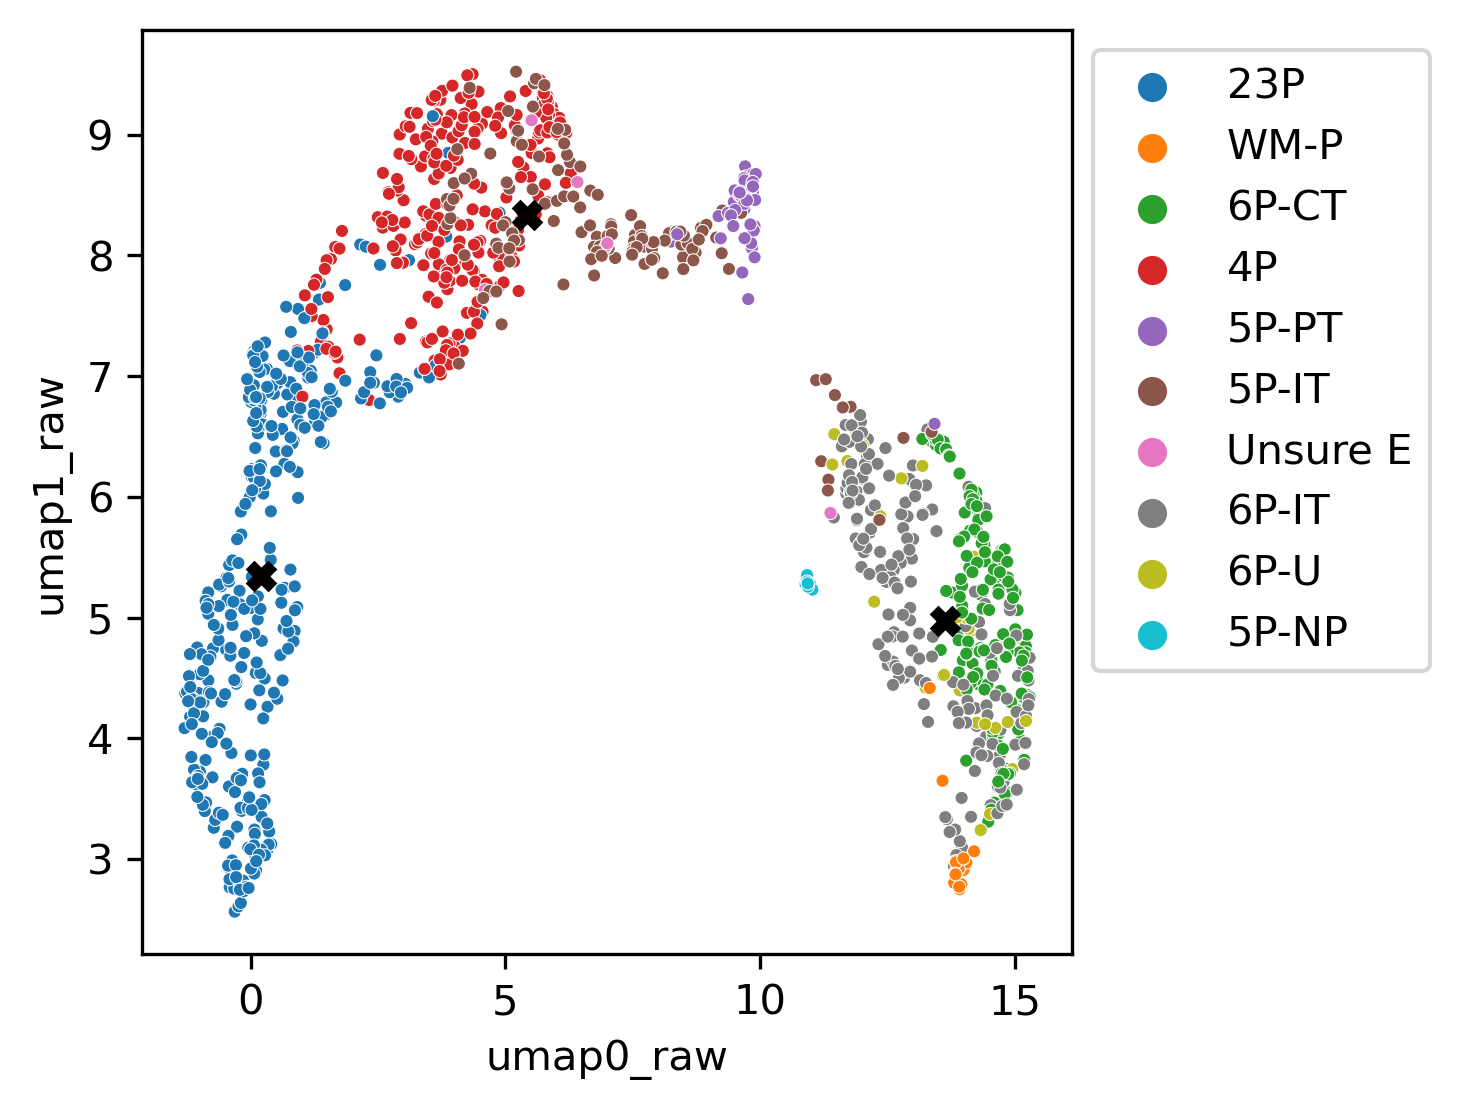

In [26]:
### SOLUTION UMAP EXAMPLE BELOW - COMMENT LATER ###
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(
    x="umap0_raw",
    y="umap1_raw",
    data=feat_df,
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="umap0_raw",
    y="umap1_raw",
    data=feat_df.query('cell_type != "Unsure I"'),
    s=10,
    hue="cell_type",
    
)

centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=30,
    linewidths=3,
    color="k",
    zorder=10,
)


ax.legend().set_bbox_to_anchor((1,1))